<a href="https://colab.research.google.com/github/talibediallo/Talibe-Data_analysis/blob/develop/Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Connexion de google colab et drive**

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##***Importation de la librairie pandas pour la manipulation des données***

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df_events = pd.read_csv('/content/drive/MyDrive/Talibe Python Use Case/HeadsetActivity.csv')
df_videos = pd.read_csv('/content/drive/MyDrive/Talibe Python Use Case/videoLength.csv')

#**Début de l'exploration des données**

##*Prendre en main le dataset HeadsetActivity*

In [83]:
df_events.shape

(58979, 4)

In [84]:
df_events.head(3)

,date,video,duration,event_type
0,2020-09-18 12:17:27+00,Tou·te·s à la cantine !,NaN,download
1,2020-09-18 12:18:02+00,La nouvelle vie des déchets,NaN,download
2,2020-09-18 12:18:51+00,Prendre son envol,NaN,download


In [85]:
df_events.tail()

,date,video,duration,event_type
58974,2024-03-24 17:06:49+00,"Réemployer pour préserver, la vie d'un chantier",1.0,play
58975,2024-03-24 17:10:17+00,Auprès des enfants... et des parents !,39.0,play
58976,2024-03-24 17:11:32+00,Accompagner vers l'épanouissement,406.0,play
58977,2024-03-24 17:19:40+00,Auprès des enfants... et des parents !,8.0,play
58978,2024-03-24 17:20:41+00,Auprès des enfants... et des parents !,17.0,play


In [86]:
df_events.sample(10)

,date,video,duration,event_type
30675,2023-03-02 08:45:50+00,Prendre son envol,133.0,play
47944,2023-05-30 12:31:47+00,Dépose de commandos de montagne,41.0,play
24426,2023-02-03 09:54:50+00,L'odeur des croissants,386.0,play
38319,2023-03-16 10:09:24+00,Operateur composants,55.0,play
4340,2022-02-23 13:35:37+00,Duo des neiges,353.0,play
1345,2021-09-15 12:39:34+00,Duo des neiges,167.0,play
14666,2022-10-04 11:59:14+00,Entraînement combat,112.0,play
26384,2023-02-04 09:27:18+00,L'émail et la plume,180.0,play
25350,2023-02-03 12:32:03+00,Par dessus les obstacles,59.0,play
26247,2023-02-03 15:47:15+00,L'odeur des croissants,386.0,play


In [87]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58979 entries, 0 to 58978
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        58979 non-null  object 
 1   video       58979 non-null  object 
 2   duration    57804 non-null  float64
 3   event_type  58979 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [88]:
is_null_df = df_events.isnull().sum()
is_null_df

date             0
video            0
duration      1175
event_type       0
dtype: int64

In [89]:
df_events.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,58979,34573,2023-03-21 08:20:06+00,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video,58979,105,Entraînement combat,3143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,57804.0,NaN,NaN,NaN,155.729067,126.043662,0.0,37.0,123.0,280.0,469.0
event_type,58979,2,play,57804,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Suppression des durations qui n'ont pas été renseigné. J'aurai pu utilise la méthode fillna pour remplacer les valeurs par :
1.   Zéro
2.   La moyenne
3.   La médiane ou encore
4.   Le mode

Mais j'ai décidé tout simplement de le supprimer pour facilité l'analyse et éviter de mettre un biais dans ma solution.

#***NB : je ferai la même chose pour le dataset videoLenght***





In [90]:
df_events = df_events.dropna(subset='duration')
df_events

,date,video,duration,event_type
49,2020-09-18 12:49:27+00,La vie en plein champ,17.0,play
51,2020-10-01 08:11:53+00,La bonne température,323.0,play
52,2020-10-01 08:45:22+00,L'odeur des croissants,64.0,play
53,2020-10-05 13:40:10+00,La nouvelle vie des déchets,149.0,play
54,2020-12-06 16:47:53+00,Assistants du futur,305.0,play
...,...,...,...,...
58974,2024-03-24 17:06:49+00,"Réemployer pour préserver, la vie d'un chantier",1.0,play
58975,2024-03-24 17:10:17+00,Auprès des enfants... et des parents !,39.0,play
58976,2024-03-24 17:11:32+00,Accompagner vers l'épanouissement,406.0,play
58977,2024-03-24 17:19:40+00,Auprès des enfants... et des parents !,8.0,play


##Calcul de la durée totale de visionnage

In [91]:
total_duration = df_events[df_events['event_type'] == 'play'].groupby('video')['duration'].sum()
total_duration

video
1000 lieues sous les mers            191357.0
Accompagner vers l'épanouissement      2200.0
Assistants du futur                  209976.0
Attention au départ !                103001.0
Attitude et langage non verbal            8.0
                                       ...   
À l'écoute du végétal                  5244.0
À la carte                           201122.0
À leurs côtés                        125363.0
Ça sent bon le bonbon                 79665.0
Étudiant en IUT                         313.0
Name: duration, Length: 105, dtype: float64

##Calcul de la durée moyenne de visionnage

In [92]:
average_duration = total_duration / df_events[df_events['event_type'] == 'play'].groupby('video')['event_type'].count()
average_duration

video
1000 lieues sous les mers            154.320161
Accompagner vers l'épanouissement    169.230769
Assistants du futur                  178.247878
Attention au départ !                141.679505
Attitude et langage non verbal         8.000000
                                        ...    
À l'écoute du végétal                 83.238095
À la carte                           167.741451
À leurs côtés                        155.730435
Ça sent bon le bonbon                169.861407
Étudiant en IUT                       78.250000
Length: 105, dtype: float64

#***Representation graphique***

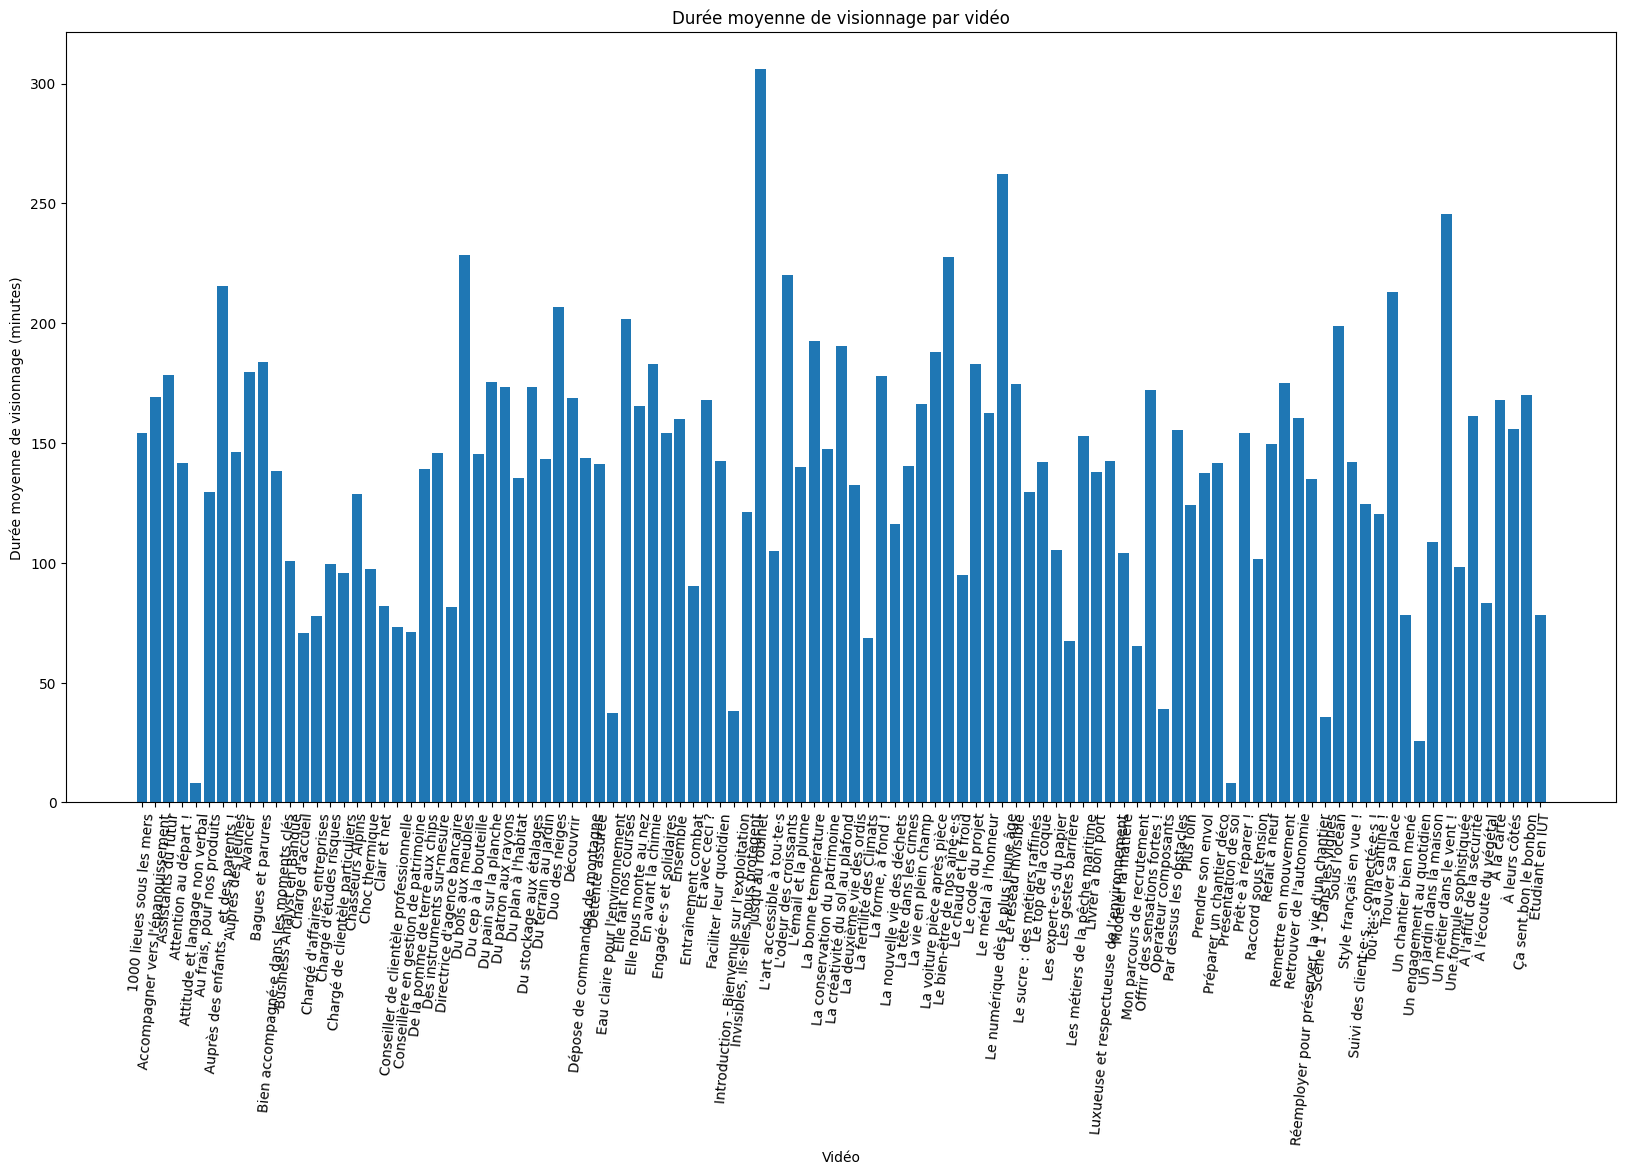

In [93]:
plt.figure(figsize=(20, 10))
plt.bar(average_duration.index, average_duration.values)
plt.xlabel('Vidéo')
plt.ylabel('Durée moyenne de visionnage (minutes)')
plt.title('Durée moyenne de visionnage par vidéo')
plt.xticks(rotation=85)
plt.show()

##*Prendre en main le dataset videoLenght*

In [94]:
df_videos.shape

(186, 3)

In [95]:
df_videos.head(3)

,video_name,sub_heading,video_length
0,Consigne - L'avis du client,NaN,126.406
1,Technicien SAV,NaN,128.370
2,À l'écoute du végétal,Chef·fe d’équipe en entretien paysager,243.165


In [96]:
df_videos.tail(3)

,video_name,sub_heading,video_length
183,La fertilité des Climats,Un viticulteur en Bourgogne,247.922
184,Par dessus les obstacles,Un chantier de travaux publics,319.368
185,Du plan à l'habitat,Le bâtiment et la construction,238.770


In [97]:
df_videos.sample(10)

,video_name,sub_heading,video_length
169,Gendarmerie,NaN,254.749
76,Dépose de commandos de montagne,NaN,194.077
104,L'univers de la maroquinerie,NaN,176.413
141,Scène 5 - Zoom sur le conditionnement,Du raisin à la bouteille,73.756
14,Employé libre service,NaN,162.738
122,Pilote de machine de bûcherronage,NaN,280.392
54,Menuisier,NaN,389.938
81,Chasseurs Alpins,NaN,185.501
7,Chargé d'affaires entreprises,NaN,157.446
48,Une formule sophistiquée,La chimie des peintures et vernis,404.188


In [98]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_name    186 non-null    object 
 1   sub_heading   120 non-null    object 
 2   video_length  186 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.5+ KB


In [99]:
df_videos.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
video_name,186,186,Consigne - L'avis du client,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_heading,120,109,Du raisin à la bouteille,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_length,186.0,NaN,NaN,NaN,261.747274,112.917455,17.862,186.74375,282.685,342.32725,481.436


##Calcul du taux de visionnage pour chaque video

In [100]:
video_lengths = df_videos.set_index('video_name')['video_length']
watch_rate = total_duration / video_lengths
video_lengths

video_name
Consigne - L'avis du client     126.406
Technicien SAV                  128.370
À l'écoute du végétal           243.165
Agent Prévention Sécurité    254.173
Elle nous monte au nez          403.378
                                 ...   
La deuxième vie des ordis       350.129
Refait à neuf                   288.732
La fertilité des Climats        247.922
Par dessus les obstacles        319.368
Du plan à l'habitat             238.770
Name: video_length, Length: 186, dtype: float64

In [101]:
watch_rate

1000 lieues sous les mers            558.580991
Accompagnant éducatif et social             NaN
Accompagner vers l'épanouissement      5.398561
Agent Prévention Sécurité                NaN
Aller plus haut                             NaN
                                        ...    
À la carte                           660.178304
À leurs côtés                        417.435576
Ça sent bon le bonbon                201.555977
Étudiant en IUT                        0.798370
Éveiller la passion                         NaN
Length: 188, dtype: float64

In [102]:
watch_rate = watch_rate.dropna()
watch_rate

1000 lieues sous les mers            558.580991
Accompagner vers l'épanouissement      5.398561
Assistants du futur                  613.081143
Attention au départ !                331.348479
Attitude et langage non verbal         0.221846
                                        ...    
À l'écoute du végétal                 21.565604
À la carte                           660.178304
À leurs côtés                        417.435576
Ça sent bon le bonbon                201.555977
Étudiant en IUT                        0.798370
Length: 103, dtype: float64

#***Representation graphique du taux de visionnage pour chaque video***

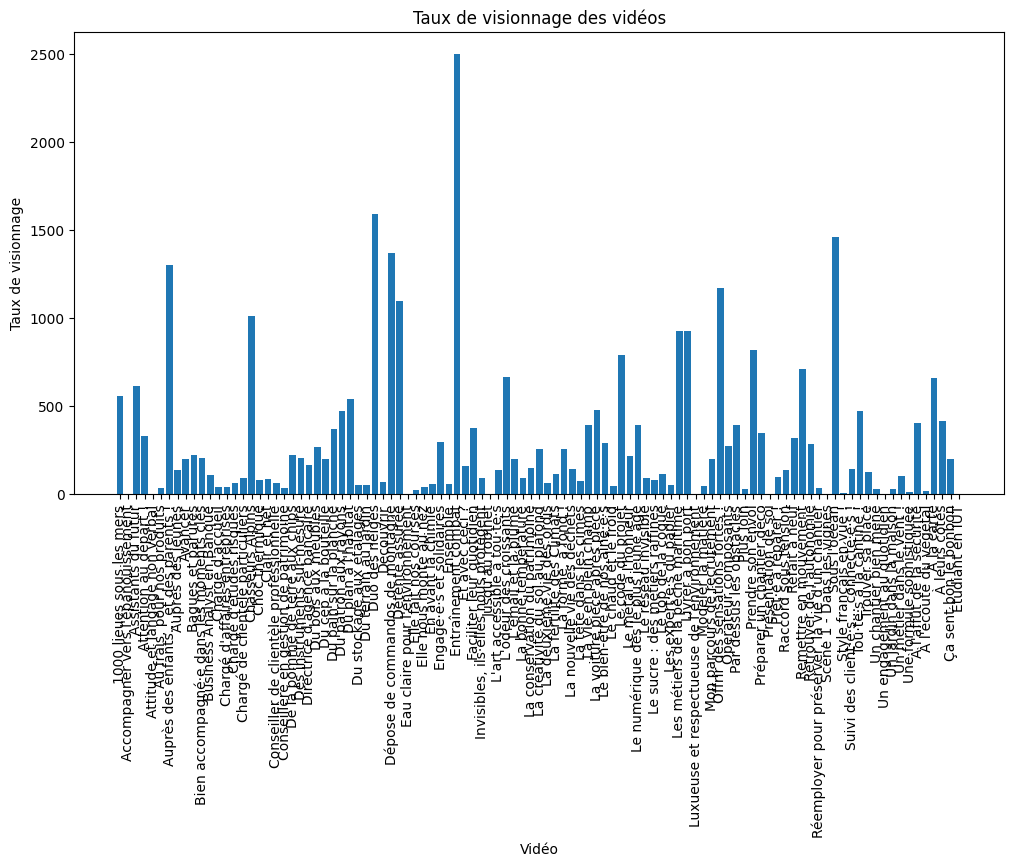

In [103]:
plt.figure(figsize=(12, 6))
plt.bar(watch_rate.index, watch_rate.values)
plt.xlabel('Vidéo')
plt.ylabel('Taux de visionnage')
plt.title('Taux de visionnage des vidéos')
plt.xticks(rotation=90)
plt.show()

#**Cycle de vie d'une vidéo**

##Filtrage sur les evenements de visionnage "Détente assurée"

In [104]:
detente_assuree_views = df_events[df_events['video'] == 'Détente assurée']
detente_assuree_views.head()

,date,video,duration,event_type
81,2020-12-18 15:51:56+00,Détente assurée,73.0,play
97,2021-01-19 10:59:29+00,Détente assurée,273.0,play
108,2021-01-21 13:11:37+00,Détente assurée,234.0,play
115,2021-01-29 07:45:54+00,Détente assurée,273.0,play
118,2021-01-29 07:57:05+00,Détente assurée,273.0,play


In [105]:
detente_assuree_views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 81 to 58957
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2145 non-null   object 
 1   video       2145 non-null   object 
 2   duration    2145 non-null   float64
 3   event_type  2145 non-null   object 
dtypes: float64(1), object(3)
memory usage: 148.3+ KB


##**Transformation de l'attribut date au format datetime et création de la nouvelle colonne month**

In [106]:
detente_assuree_views['date'] = pd.to_datetime(detente_assuree_views['date'], errors="coerce")
detente_assuree_views['month'] = detente_assuree_views['date'].dt.strftime('%Y-%m')
detente_assuree_views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 81 to 58957
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   date        2145 non-null   datetime64[ns, UTC]
 1   video       2145 non-null   object             
 2   duration    2145 non-null   float64            
 3   event_type  2145 non-null   object             
 4   month       2145 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 165.1+ KB


<ipython-input-106-536e24c64d14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detente_assuree_views['date'] = pd.to_datetime(detente_assuree_views['date'], errors="coerce")
<ipython-input-106-536e24c64d14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detente_assuree_views['month'] = detente_assuree_views['date'].dt.strftime('%Y-%m')


##Compter le nombre de vue par mois

In [107]:
views_per_month = detente_assuree_views.groupby('month')['event_type'].count()
views_per_month

month
2020-12      1
2021-01      6
2021-02      3
2021-03      4
2021-04      1
2021-05      5
2021-06     19
2021-07      6
2021-09     22
2021-10     31
2021-11     17
2021-12     25
2022-01     27
2022-02     41
2022-03    123
2022-04     32
2022-05     60
2022-06     22
2022-07      9
2022-09     37
2022-10     50
2022-11    133
2022-12     36
2023-01     52
2023-02    361
2023-03    518
2023-04     43
2023-05     27
2023-06      3
2023-07      9
2023-08      3
2023-09     27
2023-10    146
2023-11     75
2023-12     65
2024-01     80
2024-02     26
Name: event_type, dtype: int64

#***Representation graphique du nombre de vues/mois de la vidéo "Détente assurée"***

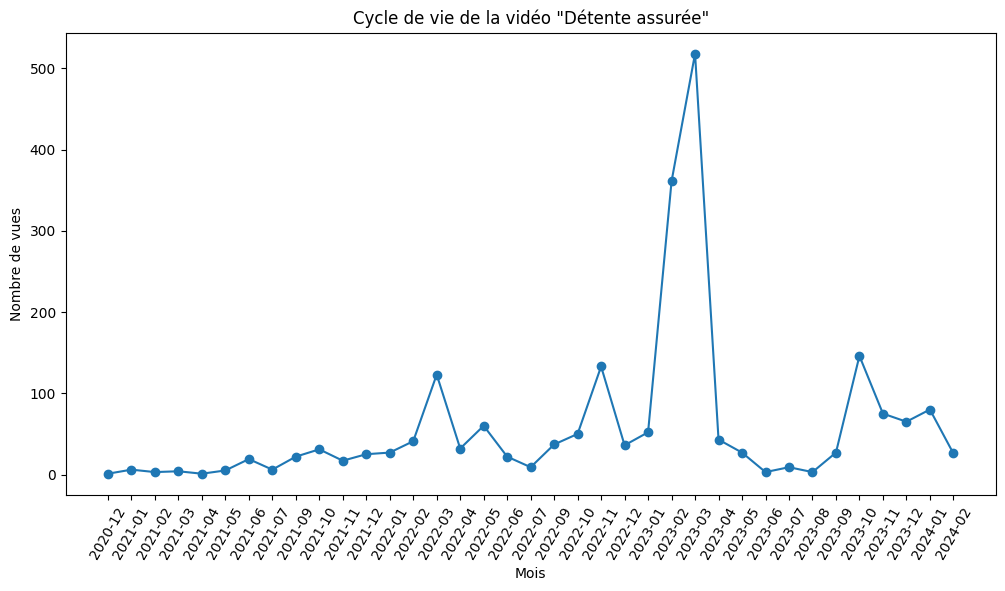

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(views_per_month.index, views_per_month.values, marker='o')
plt.xlabel('Mois')
plt.ylabel('Nombre de vues')
plt.title('Cycle de vie de la vidéo "Détente assurée"')
plt.xticks(rotation=60)
plt.show()